In [68]:
import pandas as pd
import numpy as np
import scipy.stats

In [29]:
df = pd.read_csv('temperature.csv')

In [30]:
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
datetime             45253 non-null object
Vancouver            44458 non-null float64
Portland             45252 non-null float64
San Francisco        44460 non-null float64
Seattle              45250 non-null float64
Los Angeles          45250 non-null float64
San Diego            45252 non-null float64
Las Vegas            45252 non-null float64
Phoenix              45250 non-null float64
Albuquerque          45252 non-null float64
Denver               45252 non-null float64
San Antonio          45252 non-null float64
Dallas               45249 non-null float64
Houston              45250 non-null float64
Kansas City          45252 non-null float64
Minneapolis          45240 non-null float64
Saint Louis          45252 non-null float64
Chicago              45250 non-null float64
Nashville            45251 non-null float64
Indianapolis         45246 non-null float64
Atlanta     

In [8]:
df['San Francisco'].head()

0           NaN
1    289.480000
2    289.474993
3    289.460618
4    289.446243
Name: San Francisco, dtype: float64

In [13]:
sd = df['San Diego']

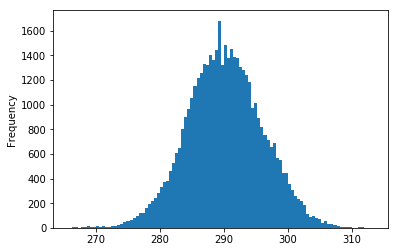

In [14]:
sd.plot.hist(bins=100)

In [62]:
description_sd = sd.describe()
description_sd

count    45252.000000
mean       290.215044
std          5.889992
min        265.783333
25%        286.254750
50%        290.118750
75%        294.107542
max        313.360000
Name: San Diego, dtype: float64

In [63]:
variance = np.power(description_sd['std'], 2)
variance

34.69200770362577

In [35]:
import datetime

In [48]:
FEB_01 = datetime.date(2013, 2, 1)
FEB_28 = datetime.date(2013, 2, 28)

In [58]:
df_feb = df[df.datetime.between('2013-02-01', '2013-02-29')]

In [77]:
description_sd_feb = df_feb['San Diego'].describe()
description_sd_feb

count    672.000000
mean     285.246950
std        3.979943
min      274.374000
25%      282.315000
50%      284.840000
75%      288.040000
max      298.600000
Name: San Diego, dtype: float64

## Confidence interval

In [89]:
p = 0.9
zp = lambda p: scipy.stats.norm.ppf((1+p) / 2)
std = description_sd['std'] # we suppose that is the real standar
sample_mean = description_sd_feb['mean']
n = description_sd_feb['count']
(p, zp(0.9), std, sample_mean, n)

(0.9, 1.6448536269514722, 5.889992164988487, 285.24695012400895, 672.0)

In [90]:
margin_error = zp(0.9) * std / np.sqrt(n)
confiance_interval = (sample_mean - margin_error, sample_mean + margin_error)
confiance_interval

(284.87322066058215, 285.62067958743575)

In [93]:
sample_std = description_sd_feb['std']
margin_error = zp(0.9) * sample_std / np.sqrt(n)
confiance_interval_t = (sample_mean - margin_error, sample_mean + margin_error)
confiance_interval_t

(284.9944163673056, 285.4994838807123)